### Topic - Machine Learning-Based Analysis of Grinding Force Measurements for Process Optimization and Grit-Tool Interaction Modelling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Loading RPM_Feedspeed_01_07.txt file

In [6]:
file_path = "K:/Applied CS/Aliesh Virani AI Material & ML Thesis/ML/RPM_Feedspeed_01_07.txt"
with open(file_path, "r") as file:
    for i in range(22):  # Print first 22 lines
        print(file.readline())
        
df = pd.read_csv(file_path, delimiter=r'\s+', skiprows=19)  # Adjust skiprows based on header position
df.columns = ["Time", "Chan_1", "Chan_2", "Chan_3", "Chan_4", "Chan_5", "Chan_6", "Chan_7", "Chan_8", "Fx", "Fy", "Fz", "Mz"]

DynoWare	Version 3.1.0.0

Path:	C:\Users\IPH-006\Desktop\Ghanshyam\ML\

Filename:	RPM_Feedspeed_01_07.dwd

Config ID:	RPM_Feedspeed_01_07.cfg

Setup ID:	0

Manipulated:	0

Filename 1:	

Filename 2:	

Date:	Tuesday, January 28, 2025

Time:	10:30:52

Sampling rate [Hz]:	20000

Measuring time [s]:	200

Delay time [s]:	0

Cycle time [s]:	0

Cycles:	1

Samples per channel:	4000001

Cycle interval:	0

Cycle No:	1

Time	Chan 1	Chan 2	Chan 3	Chan 4	Chan 5	Chan 6	Chan 7	Chan 8	Fx	Fy	Fz	Mz

s	N	N	N	N	N	N	N	N	N	N	N	Nm

0	0.152588	0.549316	0.427246	-0.610352	0.244141	-0.457764	-0.793457	-0.396729	0.701904	-0.183105	-1.40381	0.0542755

0.00005	-0.183105	0.152588	0.274658	-0.518799	0.549316	-0.366211	-0.732422	-0.0915527	-0.0305176	-0.244141	-0.640869	0.0431366



####  Data Filtering and fiture selection

#### Trimming continues data frame by removing 0 values from tail.

In [7]:
Fx_Fy_Fz = df[["Time","Fx","Fy","Fz"]]
Fx_Fy_Fz_Trim = Fx_Fy_Fz[~((df["Fx"] == 0) & (df["Fy"] == 0) & (df["Fz"] == 0))]


#### Adding column of Effective force with formula   $$  = \sqrt{F_ x^2 + F_ y^2 + F_ z^2} $$
  

 
 



In [8]:
def calculate_E_force(fx, fy, fz):
    return np.sqrt(fx**2 + fy**2 + fz**2)

Fx_Fy_Fz_Trim.loc[:,'Ef_Force'] = calculate_E_force(Fx_Fy_Fz_Trim['Fx'], Fx_Fy_Fz_Trim['Fy'], Fx_Fy_Fz_Trim['Fz'])
Fx_Fy_Fz_Trim

C:\Users\tpkak\AppData\Local\Temp\ipykernel_23744\3108762343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fx_Fy_Fz_Trim.loc[:,'Ef_Force'] = calculate_E_force(Fx_Fy_Fz_Trim['Fx'], Fx_Fy_Fz_Trim['Fy'], Fx_Fy_Fz_Trim['Fz'])


,Time,Fx,Fy,Fz,Ef_Force
0,0.00000,0.701904,-0.183105,-1.403810,1.580152
1,0.00005,-0.030518,-0.244141,-0.640869,0.686476
2,0.00010,-0.335693,-0.274658,-0.061035,0.438009
3,0.00015,-0.366211,-0.152588,-0.091553,0.407155
4,0.00020,-0.457764,-0.030518,-0.701904,0.838539
...,...,...,...,...,...
1206267,60.31335,-0.549316,-0.732422,-3.112790,3.244634
1206268,60.31340,-0.396729,-1.007080,-3.021240,3.209283
1206269,60.31345,-0.335693,-0.885010,-2.868650,3.020776
1206270,60.31350,-0.427246,-0.885010,-2.929690,3.090124


####  Plot 1, Time vs Forces Fx, Fy, Fz 

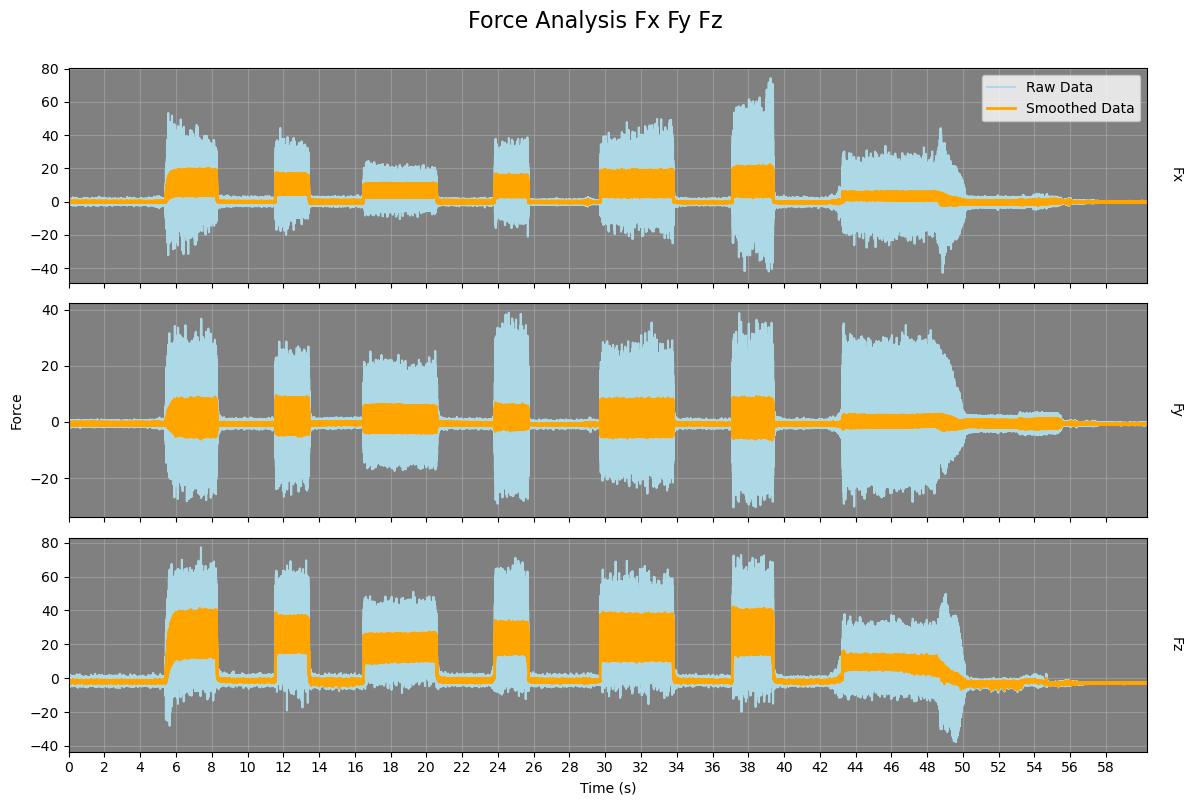

In [9]:
def scaling_forces(df):
    
    force_data = df[['Fx', 'Fy', 'Fz']].copy() 
    
    force_data_smooth = force_data.rolling(window=50, center=True).mean() # Apply rolling mean to smooth the data
   
    patterns = {}
    for column in force_data_smooth.columns:
        series = force_data_smooth[column].values
        scaler = StandardScaler()
        scaled_series = scaler.fit_transform(series.reshape(-1, 1)).ravel()
        patterns[column] = {'raw': series,'scaled': scaled_series}
    
    return patterns

def visualize_force_patterns(df, patterns):
    
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
    
    plt.subplots_adjust(hspace=0)
    
    for idx, (force, data) in enumerate(patterns.items()):
        ax = axes[idx]
        
        ax.plot(df['Time'], df[force], label='Raw Data', color='Lightblue') # Raw data
        
        ax.plot(df['Time'], data['raw'], label='Smoothed Data', linewidth=2, color='orange') # smoothed data
        
        ax.text(1.02, 0.5, force, transform=ax.transAxes, # Add force component label on the right side
                rotation=270, verticalalignment='center')
        
        if idx == 1:   
            ax.set_ylabel('Force')
        
        if idx == 0:
            ax.legend(bbox_to_anchor=(1, 1))
        
        ax.grid(True, alpha=0.5)
        ax.margins(x=0)
        
        
    axes[-1].set_xlabel('Time (s)') # Add x-label only to bottom plot
    ticks = np.arange(0,60,2)  # 0, 2, 4 ...
    plt.xticks(ticks)
    for ax in axes:
        ax.set_facecolor('gray')
    
    fig.suptitle('Force Analysis Fx Fy Fz', y=1, fontsize=16) # main title
    
    plt.tight_layout()
    return fig

# Process the data
df = Fx_Fy_Fz_Trim
patterns = scaling_forces(df)
fig = visualize_force_patterns(df, patterns)



### Plot 2, Each force pattern indivitually 

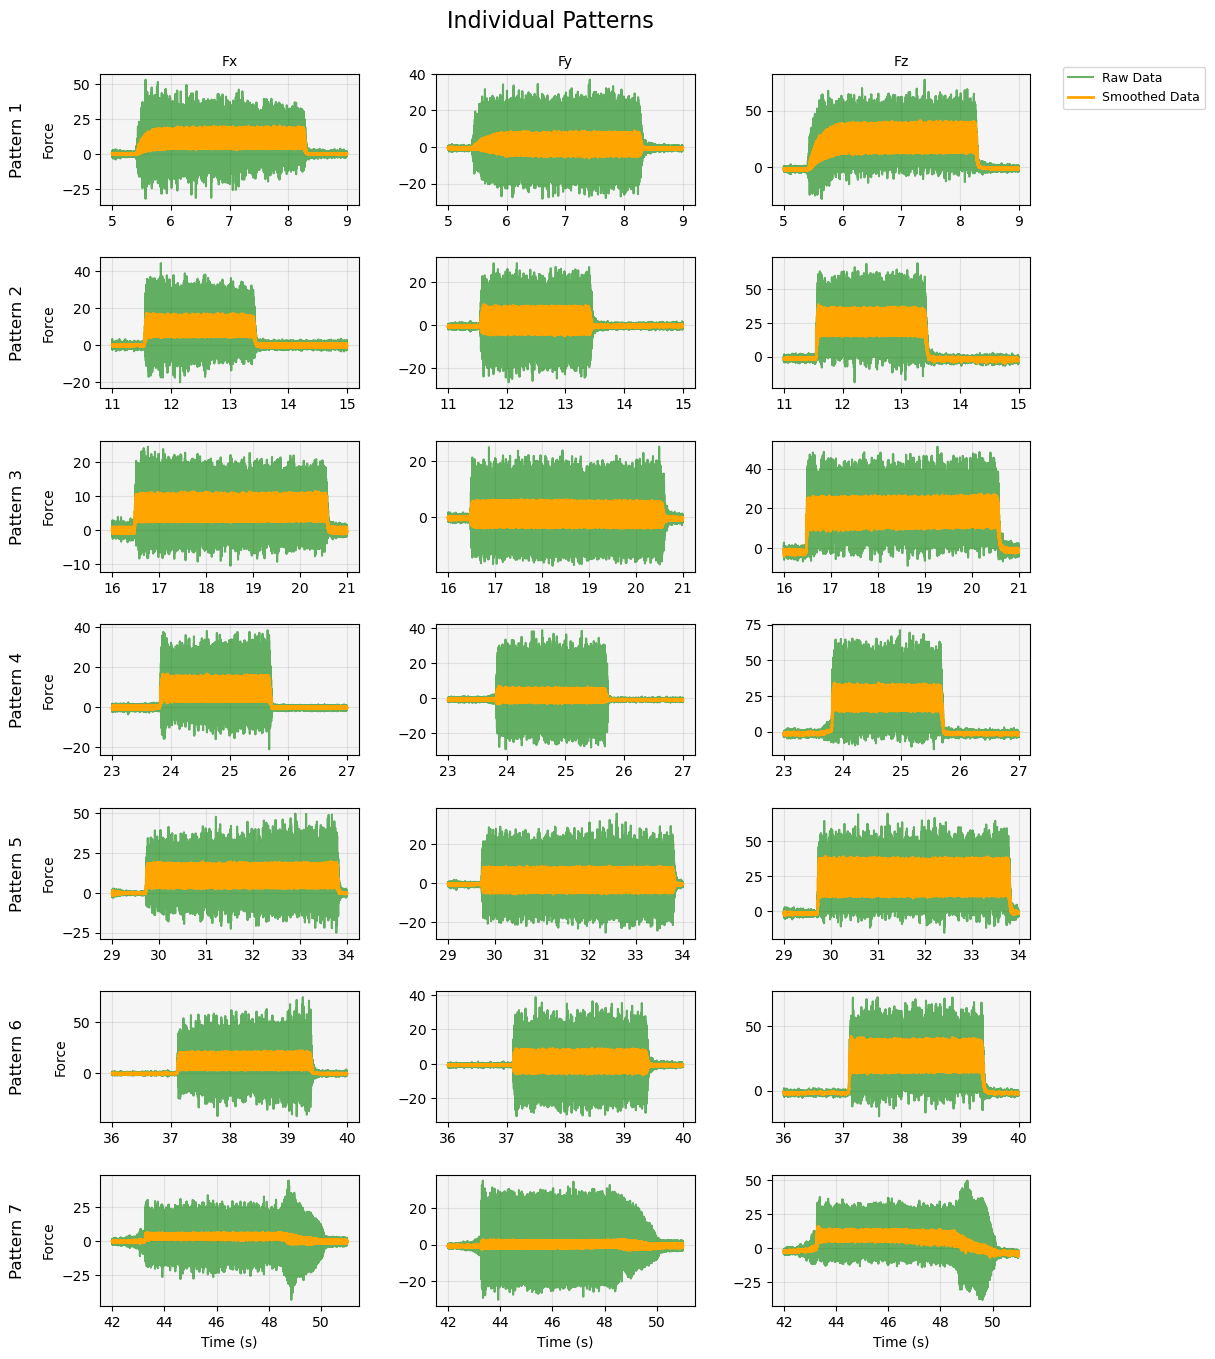

In [46]:
def visualize_all_patterns(Fx_Fy_Fz_Trim, patterns_list, pattern_times):
   
    fig = plt.figure(figsize=(12, 16)) # Create figure with grid layout
   
    gs = fig.add_gridspec(7, 3, hspace=0.4, wspace=0.3)  # Create grid spec to organize subplots
    
    all_axes = []
    for i in range(7):
        pattern_axes = []
        for j in range(3):
            ax = fig.add_subplot(gs[i, j])
            pattern_axes.append(ax)
        all_axes.append(pattern_axes)
    
    forces = ['Fx', 'Fy', 'Fz'] # Force components
    
    for pattern_idx, (pattern_df, (start_time, end_time)) in enumerate(zip(patterns_list, pattern_times)):
        
        patterns = scaling_forces(pattern_df) # Analyze pattern data
        
        axes = all_axes[pattern_idx] 
        
        for force_idx, (force, data) in enumerate(patterns.items()): # Plot each force component
            ax = axes[force_idx]
            
            # raw data
            ax.plot(pattern_df['Time'], pattern_df[force], 
                   label='Raw Data', color='green', alpha=0.6)
            
            # smoothed data
            ax.plot(pattern_df['Time'], data['raw'], 
                   label='Smoothed Data', linewidth=2, color='orange')
            
            ax.grid(True, alpha=0.3)
            ax.set_facecolor('whitesmoke')
            
            if pattern_idx == 0:
                ax.set_title(force, fontsize=10)
            
            if force_idx == 0:
                ax.text(-0.35, 0.5, f'Pattern {pattern_idx + 1}', 
                       transform=ax.transAxes, rotation=90, 
                       verticalalignment='center', fontsize=12)
            
            if force_idx == 0: # Set y-label leftmost plots
                ax.set_ylabel('Force')
                        
            if pattern_idx == 6: #Set x-label only for bottom plots
                ax.set_xlabel('Time (s)')
            
            if pattern_idx == 0 and force_idx == 2: # legends
                ax.legend(bbox_to_anchor=(1.1, 1.1), fontsize=9)
    
  
    fig.suptitle('Individual Patterns', y=0.92, fontsize=16)
    
    return fig

def plot_all_patterns(Fx_Fy_Fz_Trim):
    # Define patterns and their time ranges
    pattern_times = [
        (5.0, 9.0),   # Pattern 1
        (11.0, 15.0), # Pattern 2
        (16.0, 21.0), # Pattern 3
        (23.0, 27.0), # Pattern 4
        (29.0, 34.0), # Pattern 5
        (36.0, 40.0), # Pattern 6
        (42.0, 51.0)  # Pattern 7
    ]
    
    # Extract pattern data
    patterns_list = [Fx_Fy_Fz_Trim[(Fx_Fy_Fz_Trim['Time'] >= start) & (Fx_Fy_Fz_Trim['Time'] <= end)]
       for start, end in pattern_times
    ]
    
    # Create visualization
    fig = visualize_all_patterns(Fx_Fy_Fz_Trim, patterns_list, pattern_times)
    #plt.show()
    
    return fig

fig = plot_all_patterns(Fx_Fy_Fz_Trim)

### Plot 3, Average and Maximum of Effective grinding force

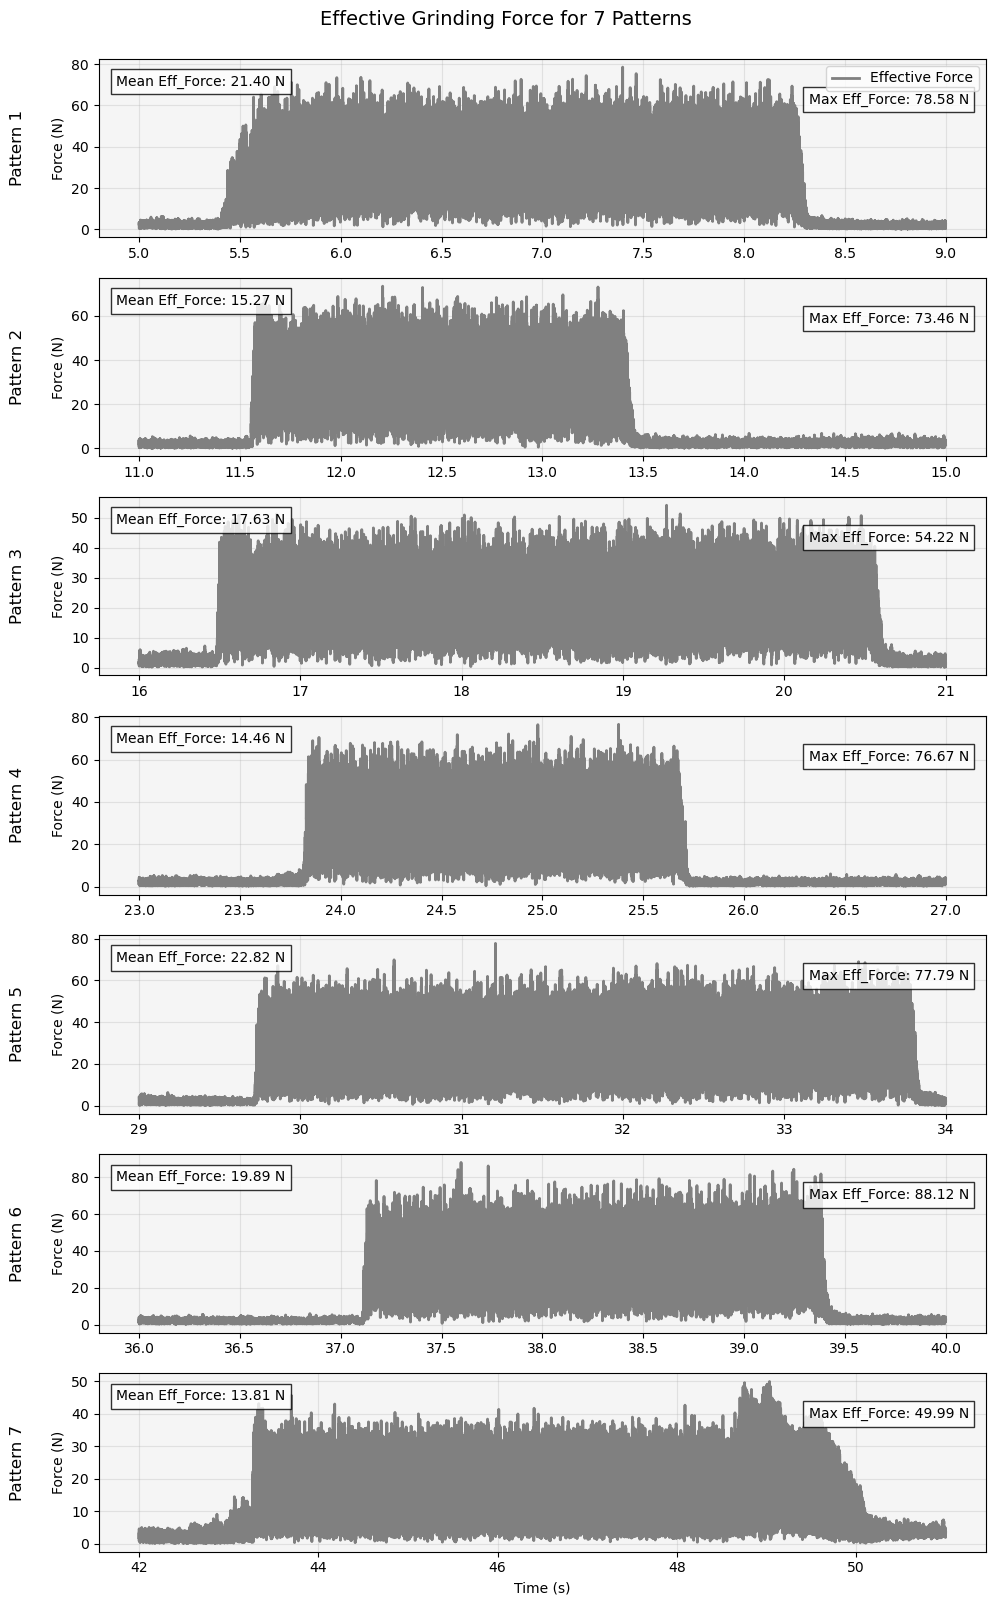

In [35]:
def visualize_effective_force_patterns(Fx_Fy_Fz_Trim, patterns_list, pattern_times):
    
    fig, axes = plt.subplots(7, 1, figsize=(10, 16)) # Create figure with subplots
    plt.subplots_adjust(hspace=0.4)
    
    # Plot each pattern
    for pattern_idx, (pattern_df, (start_time, end_time), ax) in enumerate(zip(patterns_list, pattern_times, axes)):
        # Calculate effective force for this pattern
        f_eff = calculate_E_force(
            pattern_df['Fx'],
            pattern_df['Fy'],
            pattern_df['Fz']
        )
        
        mean_f_eff = np.mean(f_eff) #  mean effective force for each pattern
        max_f_eff = np.max(f_eff) #  max effective force for each pattern
        
        
        ax.plot(pattern_df['Time'], f_eff, label='Effective Force', color='gray', linewidth=2) # Configure axis
        
        ax.grid(True, alpha=0.3) # Configure axis
        ax.set_facecolor('whitesmoke')
        
        ax.text(-0.1, 0.5, f'Pattern {pattern_idx + 1}', 
                transform=ax.transAxes, rotation=90,
                verticalalignment='center', fontsize=12)
        
        ax.text(0.02, 0.85, f'Mean Eff_Force: {mean_f_eff:.2f} N',
                transform=ax.transAxes, fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8))
        
        ax.text(0.8, 0.75, f'Max Eff_Force: {max_f_eff:.2f} N',
                transform=ax.transAxes, fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8))

        ax.set_ylabel('Force (N)')
        
        if pattern_idx == 6:
            ax.set_xlabel('Time (s)')
            
        if pattern_idx == 0:
            ax.legend(loc='upper right')
    
   
    fig.suptitle('Effective Grinding Force for 7 Patterns', fontsize=14, y=1)  # Add main title
    
    plt.tight_layout()
    return fig

def plot_effective_force_patterns(Fx_Fy_Fz_Trim):
    # Define patterns and their time ranges
    pattern_times = [
        (5.0, 9.0),   # Pattern 1
        (11.0, 15.0), # Pattern 2
        (16.0, 21.0), # Pattern 3
        (23.0, 27.0), # Pattern 4
        (29.0, 34.0), # Pattern 5
        (36.0, 40.0), # Pattern 6
        (42.0, 51.0)  # Pattern 7
    ]
    
    # Extract pattern data
    patterns_list = [
        Fx_Fy_Fz_Trim[(Fx_Fy_Fz_Trim['Time'] >= start) & (Fx_Fy_Fz_Trim['Time'] <= end)]
        for start, end in pattern_times
    ]
    
    # Create visualization
    fig = visualize_effective_force_patterns(Fx_Fy_Fz_Trim, patterns_list, pattern_times)
    plt.show()
    
    return fig

fig = plot_effective_force_patterns(Fx_Fy_Fz_Trim)

#                                                                   End
